In [39]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
climatology_path = '/mnt/qb/goswami/data/era5/weatherbench2/1990-2019_6h_1440x721.zarr'
clim = xr.open_zarr(climatology_path)

In [3]:
obs = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr")
obs_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/era5_data_normalised_sfno_01.01.2018_31.12.2018.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [19]:
obs_norm

<xarray.Dataset> Size: 442GB
Dimensions:                    (time: 1458, latitude: 721, longitude: 1440,
                                level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * time                       (time) datetime64[ns] 12kB 2018-01-01 ... 2018...
Data variables: (12/13)
    100m_u_component_of_wind   (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    100m_v_component_of_wind   (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    10m_u_component_of_wind    (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    2m_temperature             (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    geopotential               (time, level, latitude, longitude) float32 79GB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    ...                         ...
    relative_humidity          (time, level, latitude, longitude) float32 79GB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    temperature                (time, level, latitude, longitude) float32 79GB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (time, level, latitude, longitude) float32 79GB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (time, level, latitude, longitude) float32 79GB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>

In [6]:
rh = xr.open_dataset("/mnt/qb/goswami/data/era5/relative_humidity_1979_to_2018.zarr")

/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/envs/model/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


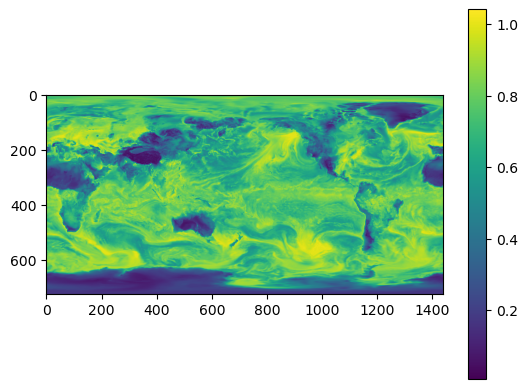

In [59]:
plt.imshow(x)
plt.colorbar()

In [4]:
# sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_lead_time=112_time=2016-2018-shuffled.zarr")
sfno = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/sfno/forecast_weights_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
# 1 film
ones =  xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/1film/ONES/forecast_checkpoint_sfno_film_mae_iter=0_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
rich_breeze =  xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

# 2film
fearless_pyramid = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/2film/fearless-pyramid/forecast_checkpoint_sfno_film_mae_iter=420_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
restful_cherry = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/21film/restful-cherry/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
# vit
devoted_breeze = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vit/devoted-breeze/forecast_checkpoint_sfno_film_transformer_iter=360_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

# gcn 
lunar_terrain = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/gcn/lunar-terrain/forecast_checkpoint_sfno_film_gcn_iter=798_epoch=0_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

# vanilla 
# 1film 
grateful_field = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/grateful-field/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
proud_totem  = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/proud-totem/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
visionary_sponge = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/visionary-sponge/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

lunar_mountain = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/lunar-montain/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
brisk_brook = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/brisk-brook/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
fragrant_grass = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/fragrant-grass/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
crimson = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/crimson/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

# 2film 
atomic_wind = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/atomic-wind/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
wandering_lion = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/wandering-lion/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
dauntless_rive = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/dauntless-river/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")

In [17]:
# evals
sfno_mse = xr.open_dataset('/mnt/qb/goswami/data/era5/weatherbench2/res/sfno/eval_onlyMSE/forecast_weights_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc')
rich_breeze_mse =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
ones_mse =  xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/1film/ONES/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")


# 2film
fearless_pyramid_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/2film/fearless-pyramid/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=420_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
restful_cherry_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/21film/restful-cherry/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
# vit
devoted_breeze_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vit/devoted-breeze/eval_onlyMSE/forecast_checkpoint_sfno_film_transformer_iter=360_epoch=2_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")

# gcn 
lunar_terrain_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/gcn/lunar-terrain/eval_onlyMSE/forecast_checkpoint_sfno_film_gcn_iter=798_epoch=0_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")

# vanilla 
# 1film 
grateful_field_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/grateful-field/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
proud_totem_mse  = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/proud-totem/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
visionary_sponge_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/visionary-sponge/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")

lunar_mountain_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/lunar-montain/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
brisk_brook_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/brisk-brook/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
fragrant_grass_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/fragrant-grass/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
crimson_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/crimson/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")

# # 2film 
atomic_wind_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/atomic-wind/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
wandering_lion_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/wandering-lion/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
dauntless_rive_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/dauntless-river/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")

In [20]:
mse_list = [
    sfno_mse,
    rich_breeze_mse,
    ones_mse,
    fearless_pyramid_mse,
    restful_cherry_mse,
    devoted_breeze_mse,
    lunar_terrain_mse,
    grateful_field_mse,
    proud_totem_mse,
    visionary_sponge_mse,
    lunar_mountain_mse,
    brisk_brook_mse,
    fragrant_grass_mse,
    crimson_mse,
    atomic_wind_mse,
    wandering_lion_mse,
    dauntless_rive_mse,]


name_list = [
    'sfno',
    'rich_breeze',
    'ones',
    'fearless_pyramid',
    'restful_cherry',
    'devoted_breeze',
    'lunar_terrain',
    'grateful_field',
    'proud_totem',
    'visionary_sponge',
    'lunar_mountain',
    'brisk_brook',
    'fragrant_grass',
    'crimson',
    'atomic_wind',
    'wandering_lion',
    'dauntless_rive',
    'divine_rain',
    'stoic_snowflake',
]

# Normalised


In [7]:

# sfno = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/sfno/forecast_lead_time=112_time=2016-2018-shuffled.zarr")
sfno_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/sfno/forecast_weights_lead_time=112_time=2018-2019_shuffled.zarr")
# 1 film
ones_norm =  xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/1film/ONES/forecast_checkpoint_sfno_film_mae_iter=0_epoch=2_lead_time=112_time=2018-2019_shuffled.zarr")
rich_breeze_norm =  xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled.zarr")

# 2film
fearless_pyramid_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/2film/fearless-pyramid/forecast_checkpoint_sfno_film_mae_iter=420_epoch=2_lead_time=112_time=2018-2019_shuffled.zarr")
restful_cherry_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/21film/restful-cherry/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
# vit
devoted_breeze_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vit/devoted-breeze/forecast_checkpoint_sfno_film_transformer_iter=360_epoch=2_lead_time=112_time=2018-2019_shuffled.zarr")

# gcn 
lunar_terrain_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/gcn/lunar-terrain/forecast_checkpoint_sfno_film_gcn_iter=798_epoch=0_lead_time=112_time=2018-2019_shuffled.zarr")

# vanilla 
# 1film 
grateful_field_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/grateful-field/wsl_forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
proud_totem_norm  = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/proud-totem/wsl_forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
visionary_sponge_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/visionary-sponge/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")

lunar_mountain_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/lunar-montain/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
brisk_brook_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/brisk-brook/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
fragrant_grass_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/fragrant-grass/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
crimson_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/crimson/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")

# 2film 
atomic_wind_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/atomic-wind/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
wandering_lion_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/wandering-lion/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
dauntless_rive_norm = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/dauntless-river/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")

# ONES
divine_rain = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/divine-rain/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled.zarr")
stoic_snowflake = xr.open_zarr("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/stoic-snowflake/forecast_checkpoint_sfno_film_mae_iter=421_epoch=0_lead_time=112_time=2018-2019_shuffled.zarr")

In [21]:
# evals
sfno_norm_mse = xr.open_dataset('/mnt/qb/goswami/data/era5/weatherbench2/res/sfno/eval_onlyMSE/forecast_weights_lead_time=112_time=2018-2019_shuffled_eval.nc')
rich_breeze_norm_mse =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_eval.nc")
ones_norm_mse =  xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/1film/ONES/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=2_lead_time=112_time=2018-2019_shuffled_eval.nc")


# 2film
fearless_pyramid_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/2film/fearless-pyramid/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=420_epoch=2_lead_time=112_time=2018-2019_shuffled_eval.nc")
restful_cherry_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/21film/restful-cherry/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
# vit
devoted_breeze_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vit/devoted-breeze/eval_onlyMSE/forecast_checkpoint_sfno_film_transformer_iter=360_epoch=2_lead_time=112_time=2018-2019_shuffled_eval.nc")

# gcn 
lunar_terrain_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/gcn/lunar-terrain/eval_onlyMSE/forecast_checkpoint_sfno_film_gcn_iter=798_epoch=0_lead_time=112_time=2018-2019_shuffled_eval.nc")

# vanilla 
# 1film 
grateful_field_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/grateful-field/eval_onlyMSE/wsl_forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
proud_totem_norm_mse  = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/proud-totem/eval_onlyMSE/wsl_forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
visionary_sponge_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/visionary-sponge/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")

lunar_mountain_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/lunar-montain/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
brisk_brook_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/brisk-brook/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
fragrant_grass_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/fragrant-grass/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
crimson_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/1film/crimson/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")



# 2film 
atomic_wind_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/atomic-wind/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
wandering_lion_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/wandering-lion/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")
dauntless_rive_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/dauntless-river/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")

# ONES
stoic_snowflake_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/stoic-snowflake/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=421_epoch=0_lead_time=112_time=2018-2019_shuffled_eval.nc")
divine_rain_norm_mse = xr.open_dataset("/mnt/qb/goswami/data/era5/weatherbench2/res/vanilla/2film/divine-rain/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_time=2018-2019_shuffled_eval.nc")


In [19]:
mse_norm_list = [
    sfno_norm_mse,         #0
    rich_breeze_norm_mse,  #1
    ones_norm_mse,         #2
    fearless_pyramid_norm_mse,#3
    restful_cherry_norm_mse,  #4
    devoted_breeze_norm_mse,  #5
    lunar_terrain_norm_mse,   #6
    grateful_field_norm_mse,  #7
    proud_totem_norm_mse,     #8
    visionary_sponge_norm_mse,#9
    lunar_mountain_norm_mse,  #10
    brisk_brook_norm_mse,     #11
    fragrant_grass_norm_mse,  #12
    crimson_norm_mse,         #13
    atomic_wind_norm_mse,     #14
    wandering_lion_norm_mse,  #15
    dauntless_rive_norm_mse,  #16
    divine_rain_norm_mse,     #17
    stoic_snowflake_norm_mse, #18
]



In [209]:
print(name_list[14])
#print(mse_norm_list[14])
print()
print("SFNO")
print(sfno_norm_mse.get(4))
print()
print("RICH BREEZE")
print(rich_breeze_norm_mse.get(4))
print()
print("ONES")
print(ones_norm_mse)

atomic_wind

SFNO
None

RICH BREEZE
None

ONES
<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) floa

In [47]:

hrs = ["6hr","7days","14days","21days","28days"]
for t in hrs:
    print("hr ",t)
    for run in mse_norm_list:
        total_mse(sfno_norm_mse,t)
        total_mse(ones_norm_mse,t)
        total_mse(fearless_pyramid_norm_mse,t)
        total_mse(visionary_sponge_norm_mse,t)
        total_mse(lunar_mountain_norm_mse,t)
        total_mse(brisk_brook_norm_mse,t)
    print("")


hr  6hr


NameError: name 'mse_norm_list' is not defined

In [ ]:
sfno_norm_mse

In [ ]:
lunar_mountain_norm_mse

In [148]:
def total_mse(run,t,norm=True):
#     lunar_terrain_mse.sel(metric='mse',lead_time=t)
    if norm:
        scf = run.sel(metric='mse',lead_time=t)[["10m_u_component_of_wind", "100m_u_component_of_wind", "10m_v_component_of_wind", "100m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure']].to_array().to_numpy()
        
    else:
        scf = run.sel(metric='mse',lead_time=t)[["10m_u_component_of_wind", "10m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure']].to_array().to_numpy()
    pf = run.sel(metric='mse',lead_time=t)[['geopotential','relative_humidity','temperature','v_component_of_wind','u_component_of_wind',]].to_array().to_numpy()
    total_mse = (scf.sum() + pf.sum())/(scf.size + pf.size)
    # print(total_mse)
    return total_mse


# t = lunar_terrain_mse.sel(metric='mse',lead_time='6hr').to_array().to_numpy()

In [34]:
levels = lunar_terrain_mse.sel(metric='mse',lead_time='6hr')[['geopotential']].level.to_numpy().astype(str)

In [77]:
pf_vars_long = []
for name in ['geopotential','temperature','relative_humidity','v_component_of_wind','u_component_of_wind']:
    for l in levels:
        pf_vars_long.append(name+ "_" + l)

pf_vars = []
for name in ['z','t','r','v','u']:
    for l in levels:
        pf_vars.append(name+ " " + l)

In [132]:
var_names_long = np.array(["10m_u_component_of_wind", "10m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure'] + pf_vars)

var_names = np.array(["u10", "u100", "v10", "v100", "sp", 't2m','tcwv','mslp'] + pf_vars)


In [135]:
def plot_all_vars(run,title,show=True):
    cmap=plt.get_cmap('hot')
    # save_path = "/media/lenny/V/Master/figures/all_vars"
    save_path = "/home/goswami/gkd965//figures/all_vars"
    # hrs = np.array(range(mean.shape[0]))*(self.validation_step_skip+1)*6 + 6
    for f in range(1):
        fig, ax = plt.subplots(figsize=(16,9))
        plt.title(title)
        hrs = ["6hr","7days","14days","21days","28days"]
        for i,t in enumerate(hrs):
            scf = run.sel(metric='mse',lead_time=t)[["10m_u_component_of_wind", "100m_u_component_of_wind", "10m_v_component_of_wind", "100m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure']].to_array().to_numpy()
            pf = run.sel(metric='mse',lead_time=t)[['geopotential','temperature','relative_humidity','v_component_of_wind','u_component_of_wind',]].to_array().to_numpy().flatten()
            mean = scf.tolist() + pf.tolist()
            # color_idx = np.flip(np.arange(len(hrs))/(len(hrs))) #np.arrange(i/(len(hrs))
            color_idx =np.arange(len(hrs)+1.5)/(len(hrs)+1.5) #np.arrange(i/(len(hrs))

            # print(color_idx)
            ax.scatter(range(len(mean)),mean,marker='o',color=cmap(color_idx[i]),label=hrs[i],alpha=0.9) # ((len(hrs)+1)-i)/(len(hrs)+1)  i/(len(hrs)+1)  
        plt.xticks(np.arange(len(var_names)), var_names, rotation='vertical')
        plt.grid()
        handles, labels = plt.gca().get_legend_handles_labels()
        # order = list(range(len(handles)))
        # order = [order[-1]] + order[:-1]
        # plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
        plt.legend()
        if show:
            plt.ylim(0,2)
            plt.show()
        else:
            if f == 0:
                plt.ylim(0,5)
                plt.savefig(os.path.join(save_path,title+"_all_vars"+"_ylimited.pdf"))
            else:
                plt.savefig(os.path.join(save_path,title+"_all_vars.pdf"))
            plt.close(fig)

In [136]:
hrs = ["6hr","7days","14days","21days","28days"]


In [188]:
def skill_score(exclude=[]):
    mse_norm_per_hr = []
    for t in hrs:
        mse_norm_per_hr.append([])
        for idx,run in enumerate(mse_norm_list):
            mse_norm_per_hr[-1].append(total_mse(run,t,norm=True))
    
    mse_norm_per_hr = np.array(mse_norm_per_hr)
    plt.figure()
    sk = []
    for idx,run in enumerate(name_list):
        if idx in exclude:
            continue
        sks = 1 - (mse_norm_per_hr[:,idx]/mse_norm_per_hr[:,0])
        sk.append(sks)
        plt.plot(hrs,sks,label= str(idx)+":"+run,marker=".")
    plt.legend()
    plt.show()
    return mse_norm_per_hr,sk
     

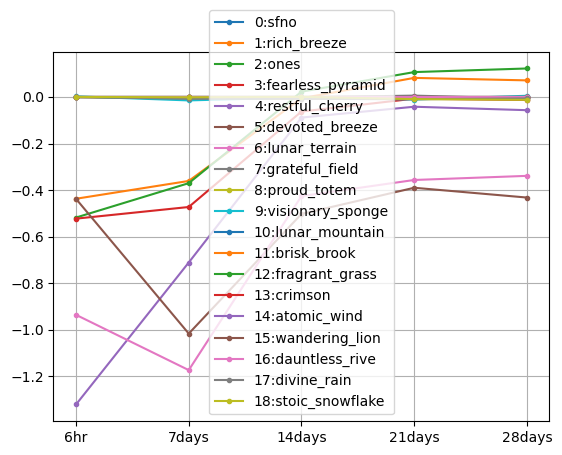

In [182]:
mse,sk = skill_score()

In [183]:
mse.shape 

(5, 19)

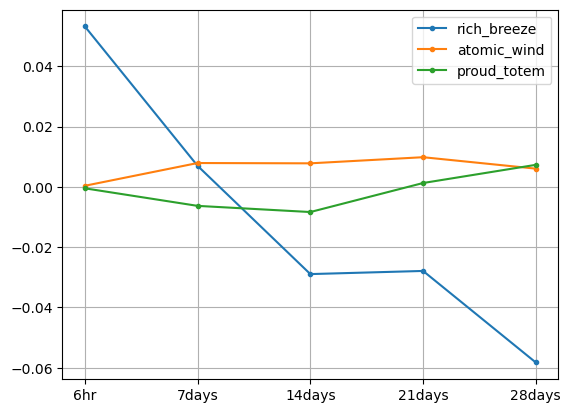

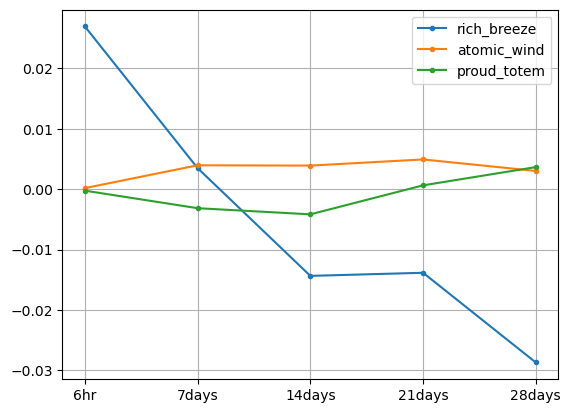

In [184]:
rich_breeze = 1
ones = 2
atomic_wind = 14
divine_rain = 17
proud_totem = 8
stoic_snowflake = 18

plt.figure()
#
sks = 1 - (mse[:,rich_breeze]/mse[:,ones])
plt.plot(hrs,sks,label= name_list[rich_breeze],marker=".")
#
sks = 1 - (mse[:,atomic_wind]/mse[:,divine_rain])
plt.plot(hrs,sks,label= name_list[atomic_wind],marker=".")
#
sks = 1 - (mse[:,proud_totem]/mse[:,stoic_snowflake])
plt.plot(hrs,sks,label= name_list[proud_totem],marker=".")
plt.legend()
plt.grid()
plt.show()

plt.figure()
#
sks = 1 - (np.sqrt(mse[:,rich_breeze])/np.sqrt(mse[:,ones]))
plt.plot(hrs,sks,label= name_list[rich_breeze],marker=".")
#
sks = 1 - (np.sqrt(mse[:,atomic_wind])/np.sqrt(mse[:,divine_rain]))
plt.plot(hrs,sks,label= name_list[atomic_wind],marker=".")
#
sks = 1 - (np.sqrt(mse[:,proud_totem])/np.sqrt(mse[:,stoic_snowflake]))
plt.plot(hrs,sks,label= name_list[proud_totem],marker=".")
plt.legend()
plt.grid()
plt.show()

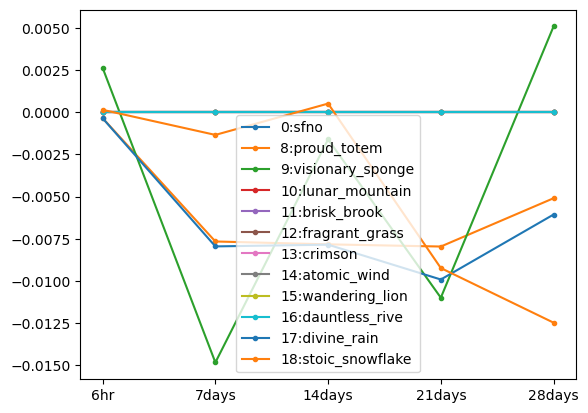

In [189]:
mse,sk = skill_score(exclude=[1,2,3,4,5,6,7])

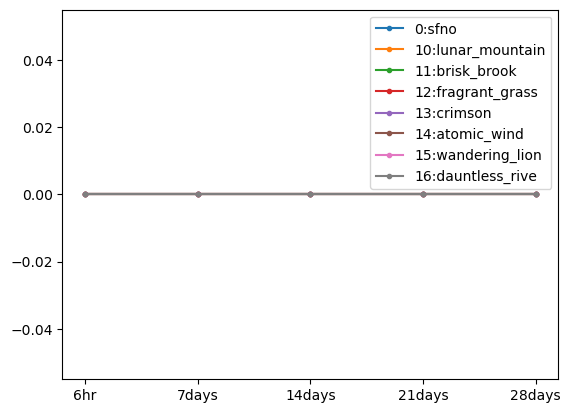

In [190]:
mse,sk = skill_score(exclude=[1,2,3,4,5,6,7,8,9,17,18])

In [191]:
for i in [1,2,3,4,5,6,7,8,9,17,18]:
    print(name_list[i])

rich_breeze
ones
fearless_pyramid
restful_cherry
devoted_breeze
lunar_terrain
grateful_field
proud_totem
visionary_sponge
divine_rain
stoic_snowflake


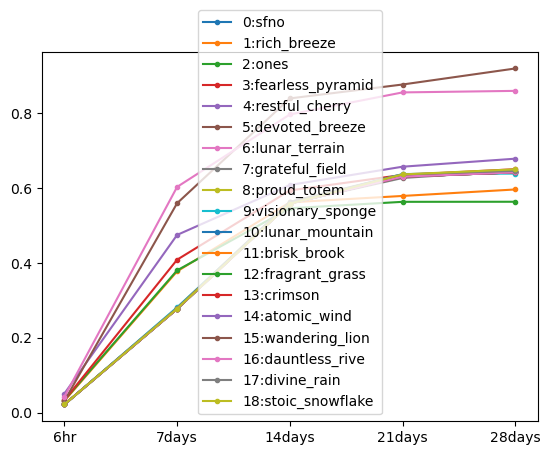

In [153]:
exclude=[]
mse_norm_per_hr = []
for t in hrs:
    mse_norm_per_hr.append([])
    for idx,run in enumerate(mse_norm_list):
        if idx in exclude:continue
        mse_norm_per_hr[-1].append(total_mse(run,t,norm=True))

mse_norm_per_hr = np.array(mse_norm_per_hr)
plt.figure()
for idx,run in enumerate(name_list):
    if idx in exclude:
        continue
    plt.plot(hrs,mse_norm_per_hr[:,idx],label= str(idx)+":"+run,marker=".")
plt.legend()
plt.show()
 

excluded : ['devoted_breeze', 'lunar_terrain']


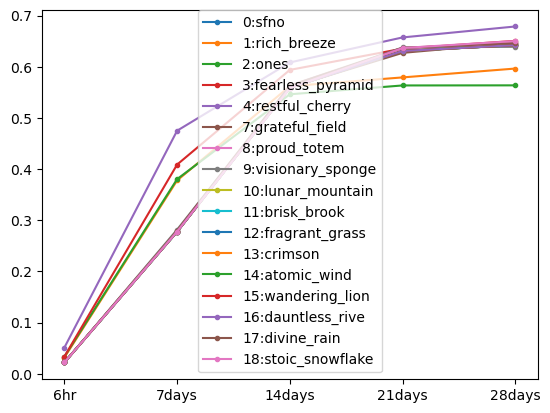

In [163]:
exclude=[5,6]
print('excluded :',[name_list[i] for i in exclude])
mse_norm_per_hr = []
for t in hrs:
    mse_norm_per_hr.append([])
    for idx,run in enumerate(mse_norm_list):
        mse_norm_per_hr[-1].append(total_mse(run,t,norm=True))

mse_norm_per_hr = np.array(mse_norm_per_hr)
plt.figure()
for idx,run in enumerate(name_list):
    if idx in exclude:
        continue
    plt.plot(hrs,mse_norm_per_hr[:,idx],label= str(idx)+":"+run,marker=".")
plt.legend()
plt.show()
 

In [201]:
print(name_list)
print("mse_norm_index", mse_norm_list[1][1])
print()
print(mse_norm_list)

['sfno', 'rich_breeze', 'ones', 'fearless_pyramid', 'restful_cherry', 'devoted_breeze', 'lunar_terrain', 'grateful_field', 'proud_totem', 'visionary_sponge', 'lunar_mountain', 'brisk_brook', 'fragrant_grass', 'crimson', 'atomic_wind', 'wandering_lion', 'dauntless_rive', 'divine_rain', 'stoic_snowflake']


KeyError: "No variable named 1. Variables on the dataset include ['level', 'lead_time', 'geopotential', 'relative_humidity', 'temperature', ..., 'surface_pressure', '2m_temperature', 'total_column_water_vapour', 'mean_sea_level_pressure', 'metric']"

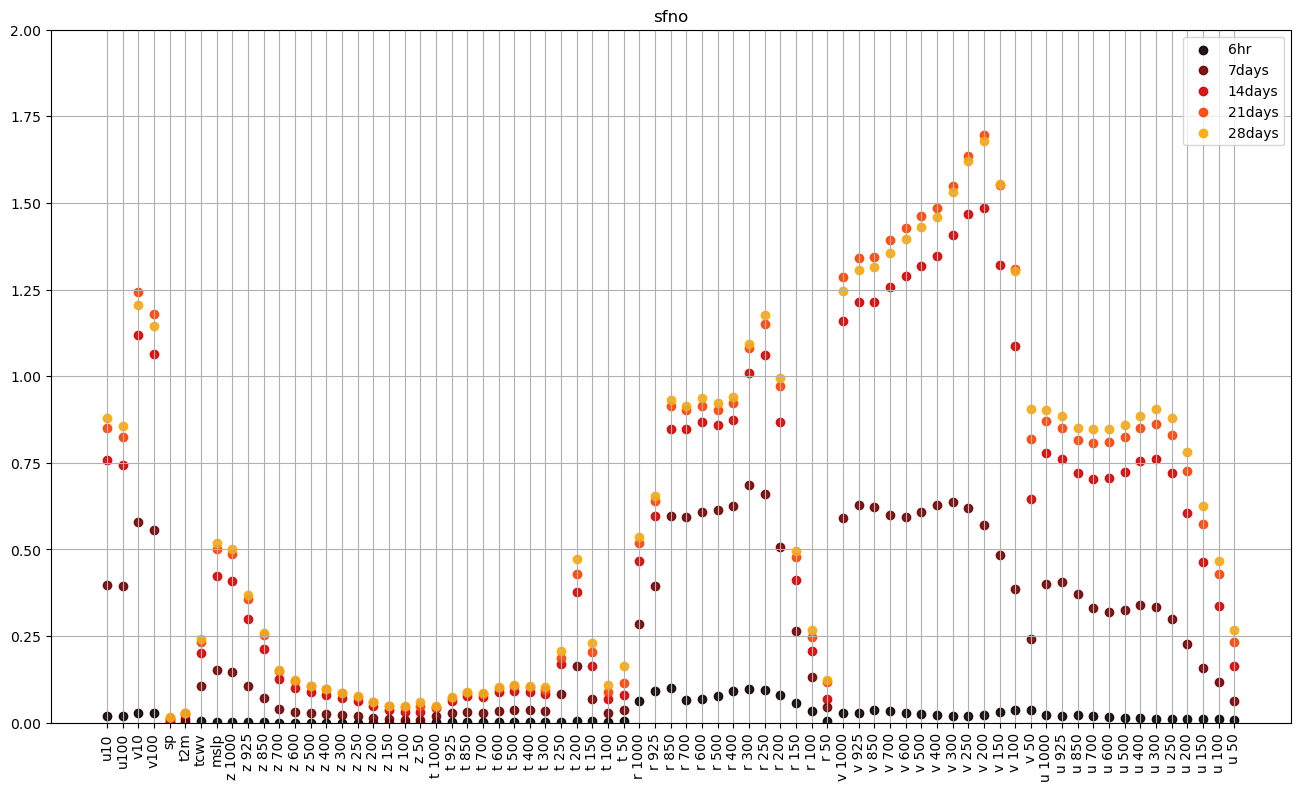

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

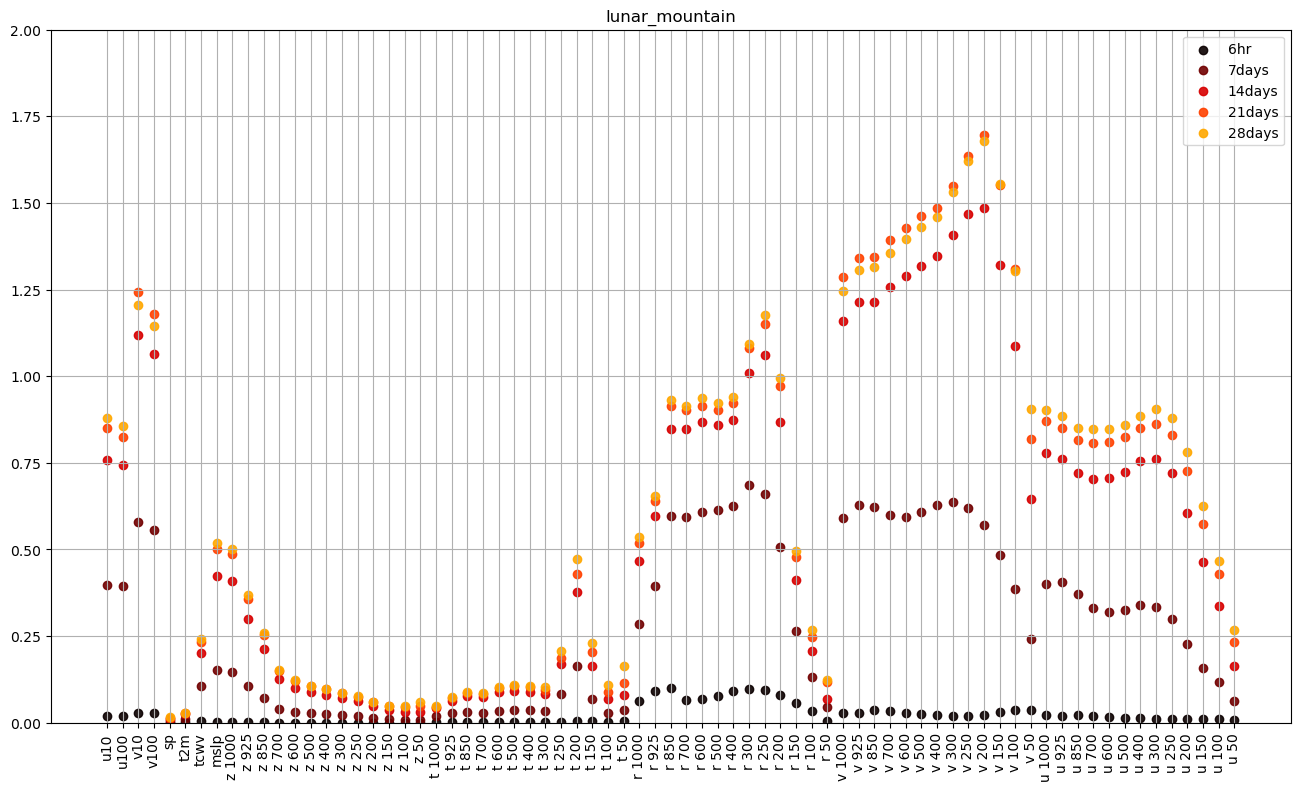

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

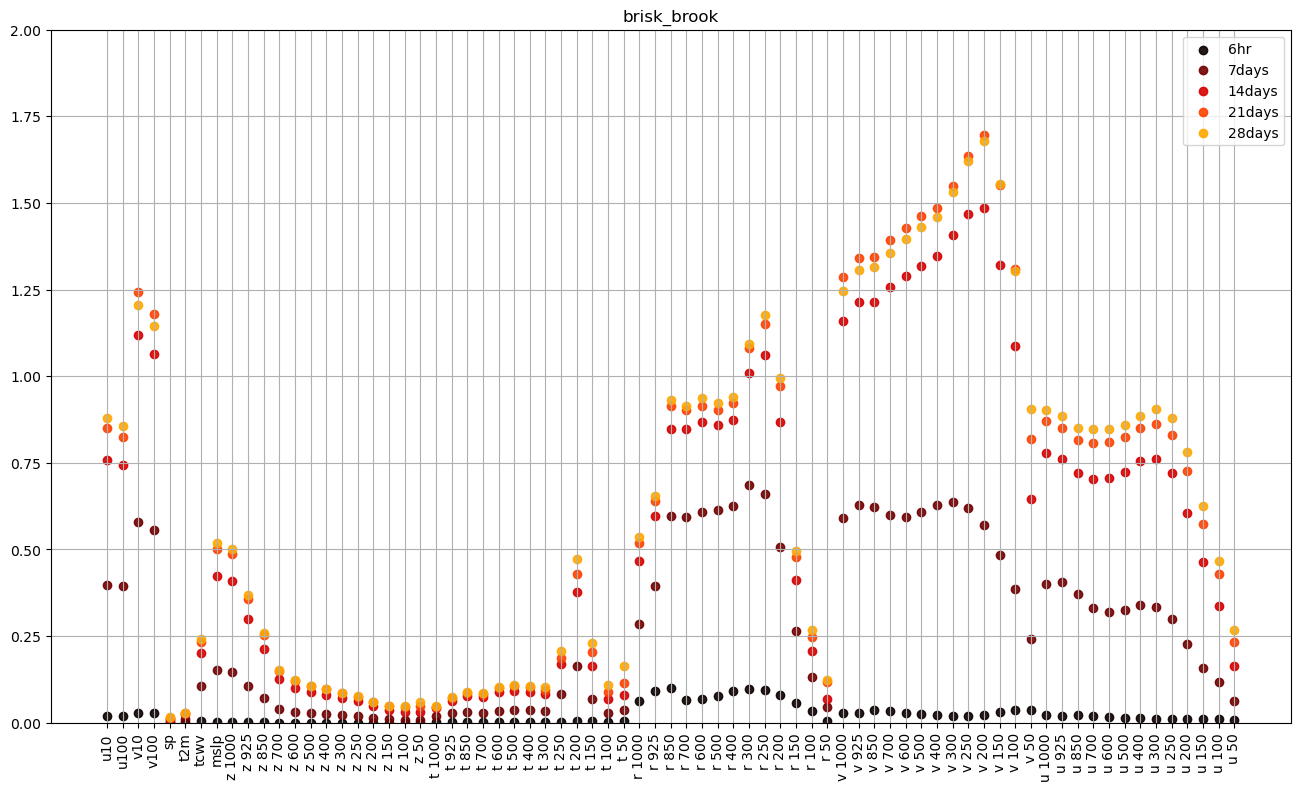

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

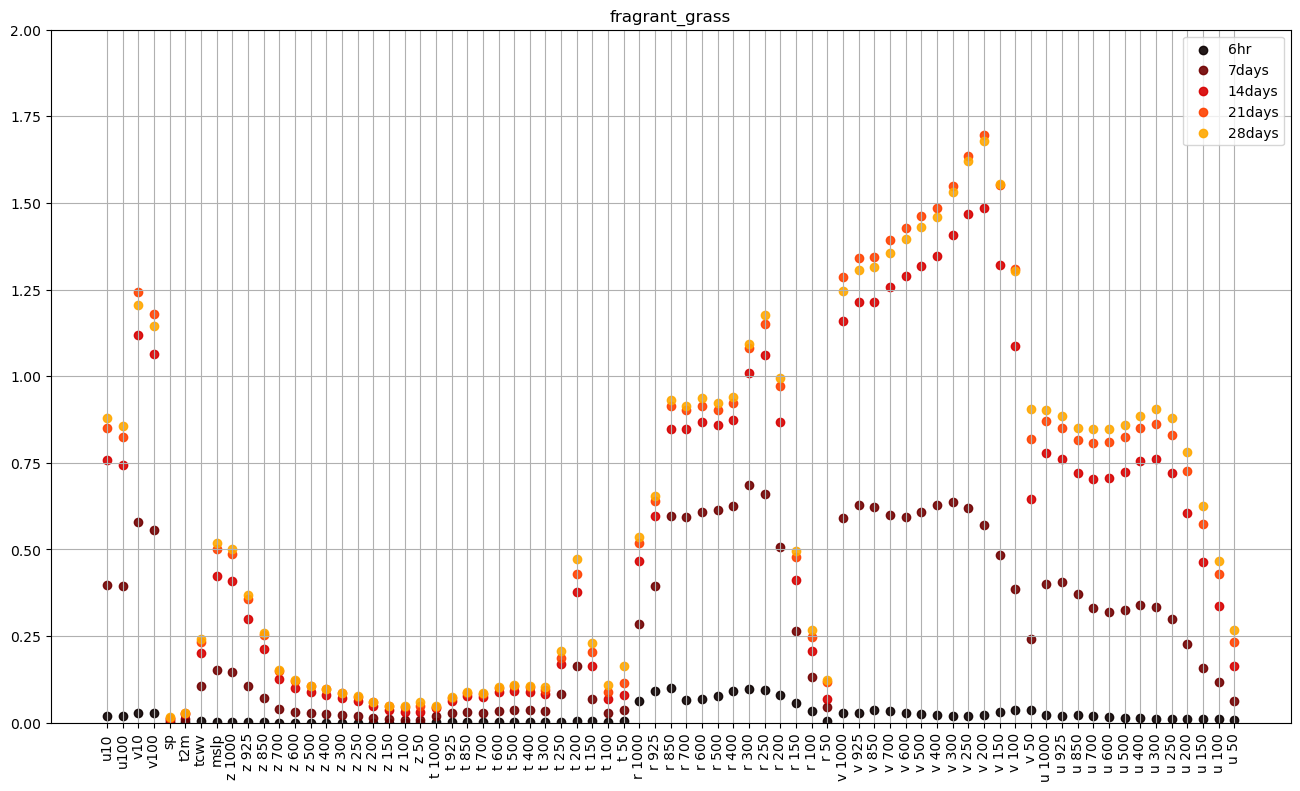

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

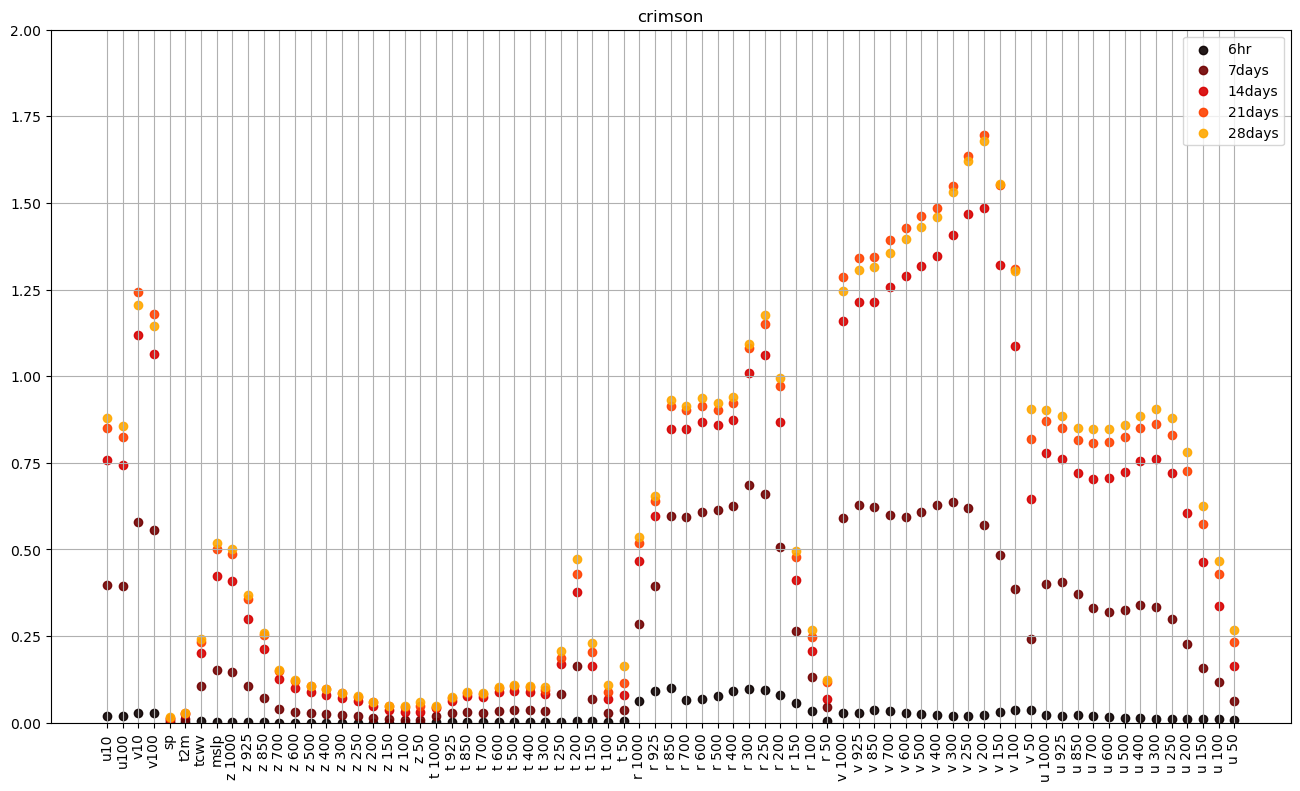

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

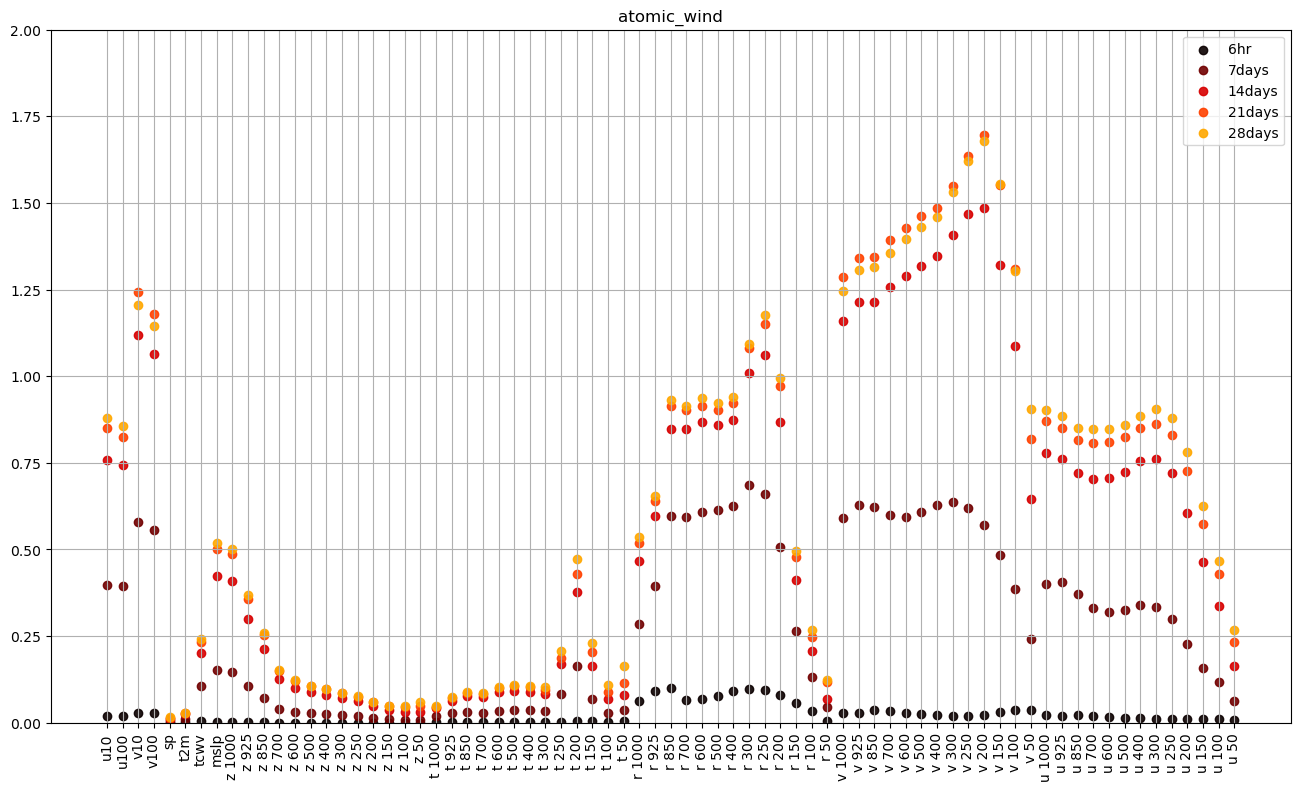

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

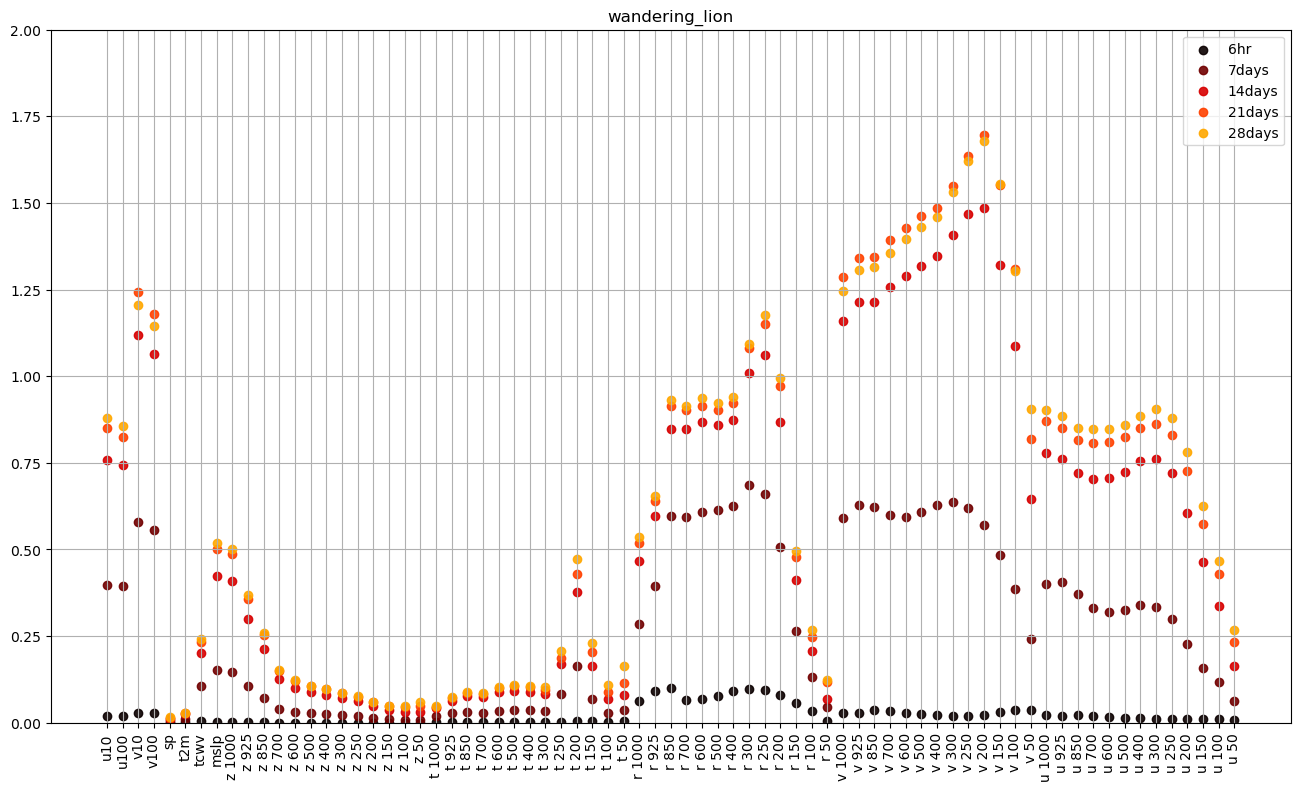

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

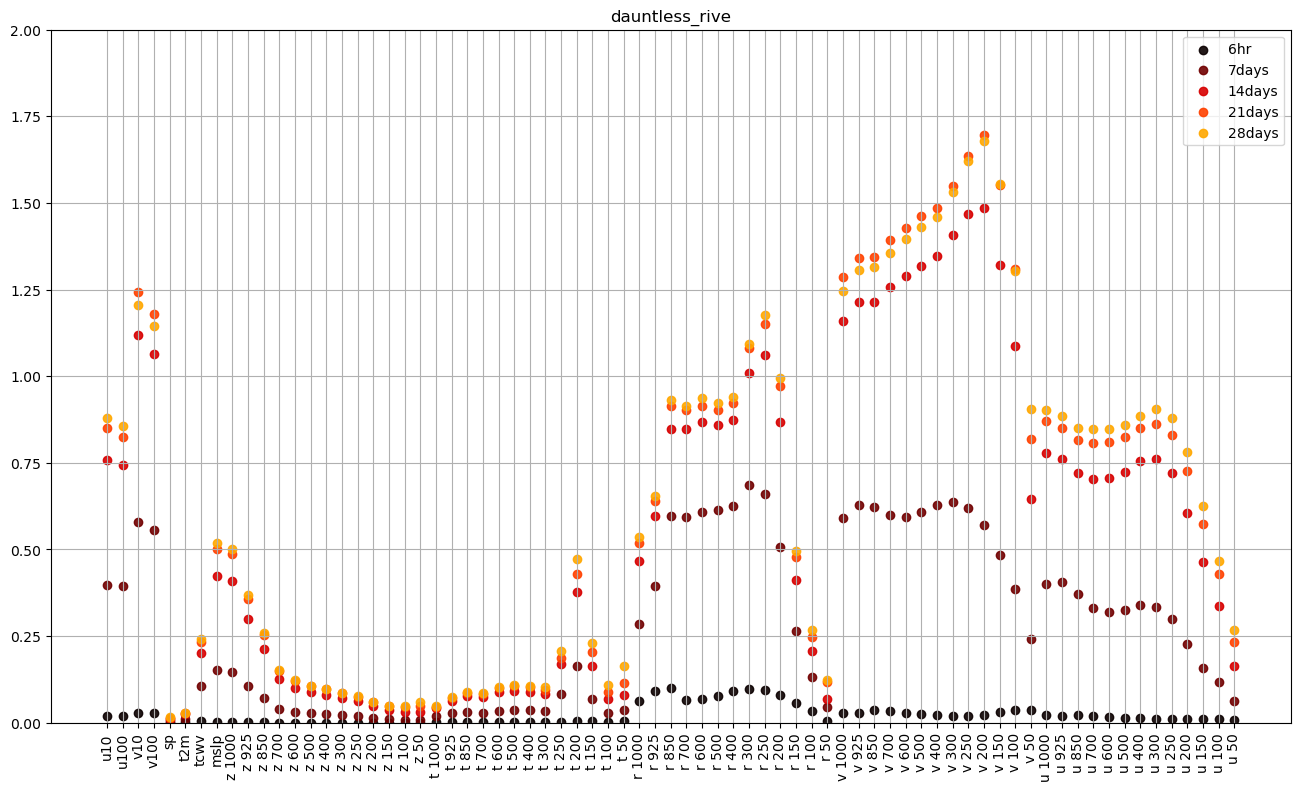

<xarray.Dataset> Size: 6kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables: (12/13)
    geopotential               (metric, lead_time, level) float64 1kB ...
    relative_humidity          (metric, lead_time, level) float64 1kB ...
    temperature                (metric, lead_time, level) float64 1kB ...
    v_component_of_wind        (metric, lead_time, level) float64 1kB ...
    u_component_of_wind        (metric, lead_time, level) float64 1kB ...
    10m_u_component_of_wind    (metric, lead_time) float64 80B ...
    ...                         ...
    100m_u_component_of_wind   (metric, lead_time) float64 80B ...
    100m_v_component_of_wind   (metric, lead_time) float64 80B ...
    surface_pressure           (met

In [193]:
exclude=[1,2,3,4,5,6,7,8,9,17,18]
for idx,run in enumerate(mse_norm_list):
    if idx in exclude: continue
    plot_all_vars(run,name_list[idx])
    print(run)

In [111]:
pf = lunar_terrain_mse.sel(metric='mse',lead_time='6hr')[['geopotential','relative_humidity','temperature','v_component_of_wind','u_component_of_wind',]].to_array().to_numpy().flatten()
test = lunar_terrain_mse.sel(metric='mse',lead_time='6hr')['relative_humidity'].to_numpy()
print(test)
print(pf[13:13+13])

[5868.901   6233.911   4862.0107  3103.763   2882.7822  2631.7136
 2803.07    3294.635   3047.0388  2520.3171  2004.5044  2391.3958
   85.81871]
[5868.901   6233.911   4862.0107  3103.763   2882.7822  2631.7136
 2803.07    3294.635   3047.0388  2520.3171  2004.5044  2391.3958
   85.81871]


In [214]:

mae = []
hrs = ["6hr","7days","14days","21days","28days"]
imgs = []
scf_sfno = mse_list[0].sel(metric='mse',lead_time='6hr')[["10m_u_component_of_wind", "10m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure']].to_array().to_numpy()
pf_sfno  = mse_list[0].sel(metric='mse',lead_time='6hr')[['geopotential','relative_humidity','temperature','v_component_of_wind','u_component_of_wind',]].to_array().to_numpy().flatten()
for idx,run in enumerate(mse_list[1:]):
    # if idx in [4,5,6]:
    #     continue
    metric = []
    for t in hrs:
        scf = run.sel(metric='mse',lead_time=t)[["10m_u_component_of_wind", "10m_v_component_of_wind",  "surface_pressure", '2m_temperature','total_column_water_vapour','mean_sea_level_pressure']].to_array().to_numpy()
        pf = run.sel(metric='mse',lead_time=t)[['geopotential','relative_humidity','temperature','v_component_of_wind','u_component_of_wind',]].to_array().to_numpy().flatten()
        scf_metric = (scf - scf_sfno).tolist()
        pf_metric = (pf - pf_sfno).tolist()
        x = scf_metric+pf_metric
        metric.append(x)
        # print(x[:10])
    mae.append(metric)

rich_breeze
step  0
     relative_humidity_925 -31.53759765625
     relative_humidity_850 -9.9033203125
     relative_humidity_700 -32.76513671875
     relative_humidity_600 -33.777099609375
     relative_humidity_500 -21.501953125
     relative_humidity_400 -12.239990234375
     relative_humidity_300 -13.2705078125
     relative_humidity_250 -1.76953125
     relative_humidity_200 -22.994140625
     relative_humidity_100 -48.368408203125
     relative_humidity_50 -6.48638916015625

step  1
     relative_humidity_850 -165.77783203125
     relative_humidity_700 -305.425537109375
     relative_humidity_600 -352.760498046875
     relative_humidity_500 -381.427490234375
     relative_humidity_400 -333.67431640625
     relative_humidity_300 -374.485107421875
     relative_humidity_250 -357.662841796875
     relative_humidity_200 -348.097900390625
     relative_humidity_150 -144.767578125
     relative_humidity_100 -275.12548828125
     relative_humidity_50 -5.30377197265625

step  2
     rel

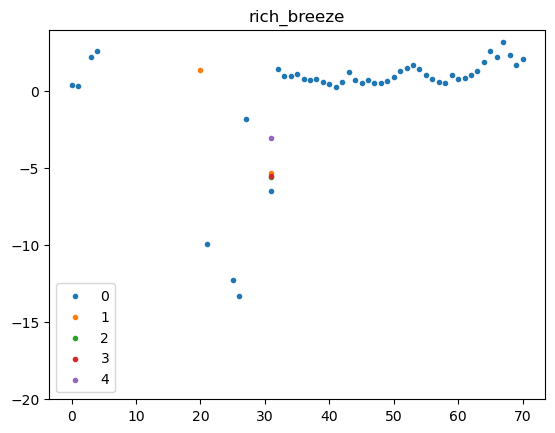

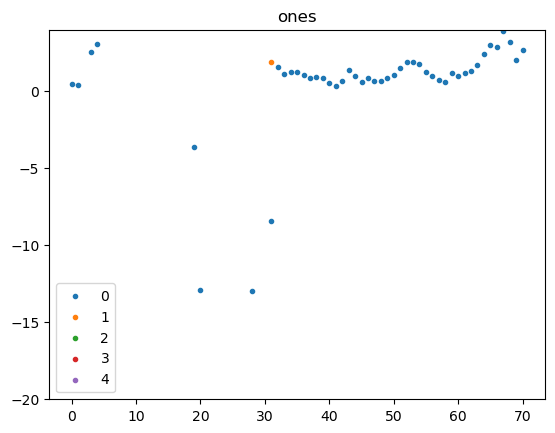

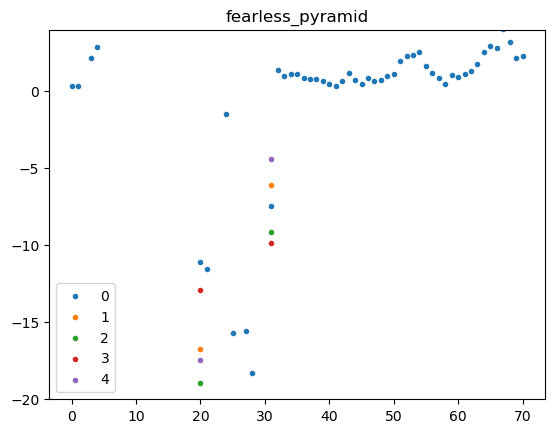

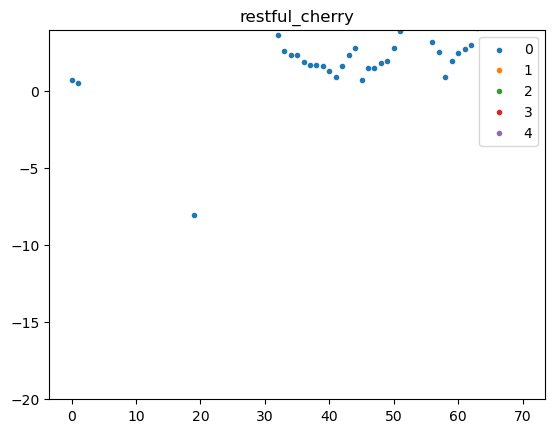

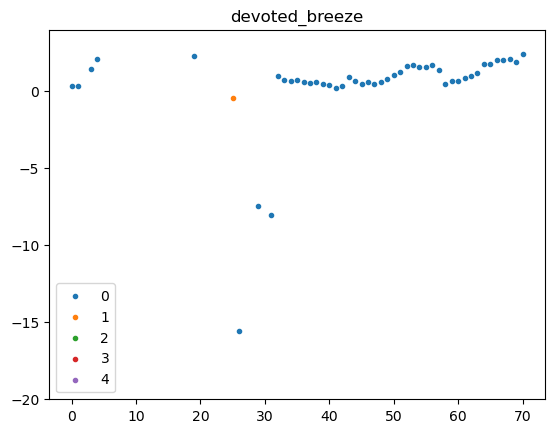

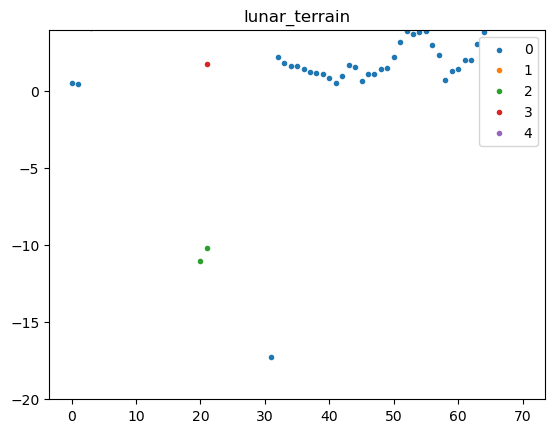

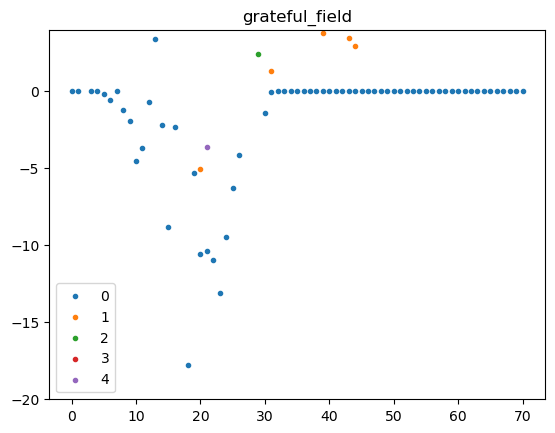

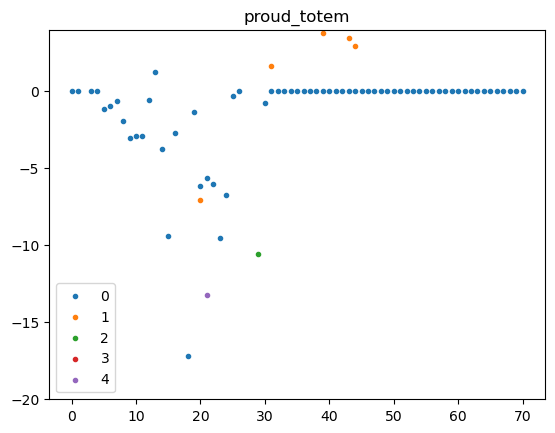

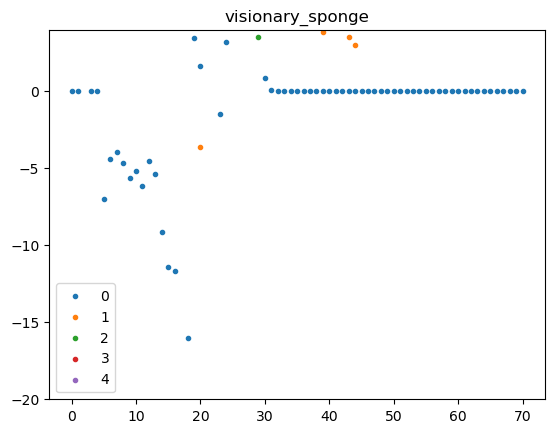

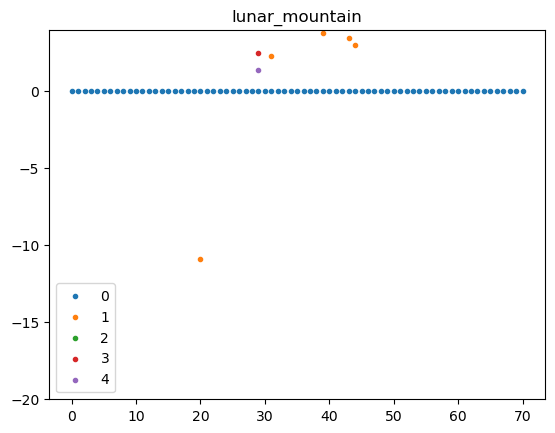

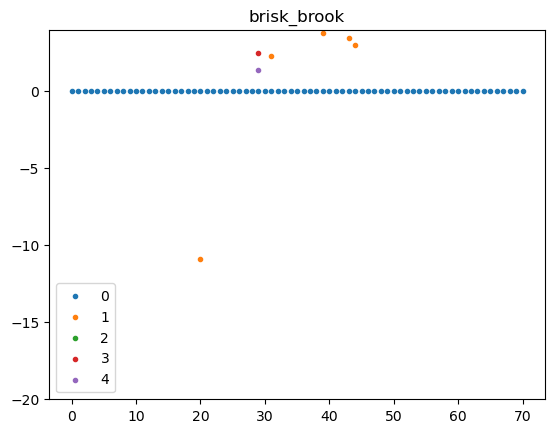

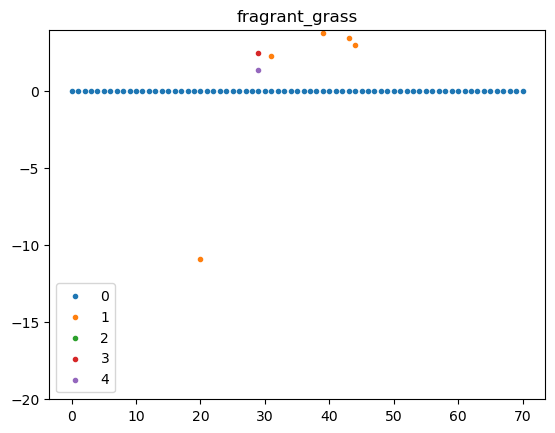

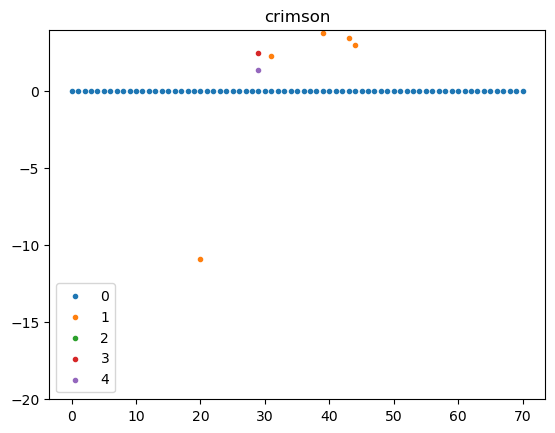

In [216]:
better_list = []

for i, metric in enumerate(np.array(mae)):
    # print(metric.shape)
    
    run_name = name_list[i+1]
    
    print(run_name)
    #print("metric: ", metric)
    #print("var_names: ", var_names)
    
    plt.figure()
    plt.title(run_name)
    
    for j, time in enumerate(metric):
        print("step ",j )
        
        better = time < 0

        better_list_name = []
        better_list_value = []
        
       # print("var_names[better]: ", var_names[better])
        
        for idx_name, name in enumerate(var_names[better]):
            #max_name, max_idx = "none", 0
            value = time[better][idx_name] 
            
            print("    ",name,value)
            
            #if abs(value) >= max_idx:
                #max_name, max_idx = name, value

            better_list_name.append(name)
            better_list_value.append(value)

        better_list_stepwise = [run_name, f"Step {j}", better_list_name, better_list_value]
        better_list.append(better_list_stepwise)
                
        #print()
        #print("better_list:    ", better_list)
        print()
        # print(time[better])
        # print(time[0:10])
        
        plt.scatter(list(range(time.shape[0])),time,marker='.',label=str(j))
    
    plt.legend()
    plt.ylim((-20,4))
    plt.show



In [206]:
## Aggregate Data

# Convert the `better_list` into a structured NumPy array
# We need to know the maximum length of var_names and var_values to create a consistent array shape
max_vars = max(len(run[2]) for run in better_list)

# Initialize lists to hold the data
run_names = []
steps = []
all_var_names = []
all_var_values = []

# Iterate over each run and aggregate the data
for run in better_list:
    run_name = run[0]
    step = run[1]
    var_names = run[2]
    var_values = run[3]
    
    # Pad var_names and var_values to ensure consistent length
    padded_var_names = var_names + [""] * (max_vars - len(var_names))
    padded_var_values = var_values + [np.nan] * (max_vars - len(var_values))
    
    run_names.append(run_name)
    steps.append(step)
    all_var_names.append(padded_var_names)
    all_var_values.append(padded_var_values)

# Convert lists to numpy arrays
run_names = np.array(run_names)
steps = np.array(steps)
all_var_names = np.array(all_var_names)
all_var_values = np.array(all_var_values, dtype=np.float64)


In [22]:
## Find Minimum and Maximum Values per Variable across Runs

# Initialize dictionaries to hold min and max values for each variable
min_values_dict = {}
max_values_dict = {}

# Iterate over unique variable names
for var in unique_vars:
    if var == "":
        continue
    
    # Get a mask for the current variable
    var_mask = (all_var_names == var)
    
    # Extract values for the current variable
    var_values = np.where(var_mask, all_var_values, np.nan)
    
    # Calculate min and max values across all runs
    min_values = np.nanmin(var_values, axis=0)
    max_values = np.nanmax(var_values, axis=0)
    
    # Store the min and max values in the dictionaries
    min_values_dict[var] = min_values
    max_values_dict[var] = max_values

# Print the min and max values
for var in unique_vars:
    if var == "":
        continue
    # print(f"Min values for {var}: {min_values_dict[var]}")
    # print(f"Max values for {var}: {max_values_dict[var]}")

NameError: name 'unique_vars' is not defined

In [23]:
## Compare Specific Variables Across Runs and Steps

# Define a function to extract values for a specific variable across runs and steps

def extract_variable_values(var_name):
    var_mask = (all_var_names == var_name)
    var_values = np.where(var_mask, all_var_values, np.nan)
    return var_values

# Example: Extract values for a specific variable, e.g., 'relative_humidity_925'
variable_to_compare = 'relative_humidity_925'
extracted_values = extract_variable_values(variable_to_compare)

# Print the extracted values
# for i, (run_name, step) in enumerate(zip(run_names, steps)):
#     print(f"Run: {run_name}, Step: {step}, {variable_to_compare}: {extracted_values[i]}")


NameError: name 'all_var_names' is not defined

In [210]:
# Convert the `better_list` into a structured NumPy array
max_vars = max(len(run[2]) for run in better_list)

run_names = []
steps = []
all_var_names = []
all_var_values = []

for run in better_list:
    run_name = run[0]
    step = run[1]
    var_names = run[2]
    var_values = run[3]
    
    padded_var_names = var_names + [""] * (max_vars - len(var_names))
    padded_var_values = var_values + [np.nan] * (max_vars - len(var_values))
    
    run_names.append(run_name)
    steps.append(step)
    all_var_names.append(padded_var_names)
    all_var_values.append(padded_var_values)

run_names = np.array(run_names)
steps = np.array(steps)
all_var_names = np.array(all_var_names)
all_var_values = np.array(all_var_values, dtype=np.float64)

# Calculate overall improvement per run
improvement_per_run = {}

unique_run_names = np.unique(run_names)
for run in unique_run_names:
    run_mask = (run_names == run)
    run_values = all_var_values[run_mask]
    
    # Consider only the negative improvements
    negative_improvements = np.where(run_values < 0, run_values, 0)
    total_improvement = np.nansum(negative_improvements)
    
    improvement_per_run[run] = total_improvement

# Determine the best run based on the highest total improvement (least negative sum)
best_run = min(improvement_per_run, key=improvement_per_run.get)
best_run_total_improvement = improvement_per_run[best_run]

print(f"The best run is {best_run} with a total improvement of {best_run_total_improvement}")

# Print the total improvement for each run
for run, total_improvement in improvement_per_run.items():
    print(f"Total improvement for {run}: {total_improvement}")


The best run is ones with a total improvement of -15007.43994140625
Total improvement for brisk_brook: -6723.18408203125
Total improvement for crimson: -6723.18408203125
Total improvement for devoted_breeze: -6014.243927001953
Total improvement for fearless_pyramid: -10121.529792785645
Total improvement for fragrant_grass: -6723.18408203125
Total improvement for grateful_field: -6079.171185806394
Total improvement for lunar_mountain: -6723.18408203125
Total improvement for lunar_terrain: -8837.817604064941
Total improvement for ones: -15007.43994140625
Total improvement for proud_totem: -5946.010329917073
Total improvement for restful_cherry: -11992.958812713623
Total improvement for rich_breeze: -13084.09423828125
Total improvement for visionary_sponge: -5666.671273112297


In [211]:
import numpy as np

# Convert the `better_list` into a structured NumPy array
max_vars = max(len(run[2]) for run in better_list)

run_names = []
steps = []
all_var_names = []
all_var_values = []

for run in better_list:
    run_name = run[0]
    step = run[1]
    var_names = run[2]
    var_values = run[3]
    
    padded_var_names = var_names + [""] * (max_vars - len(var_names))
    padded_var_values = var_values + [np.nan] * (max_vars - len(var_values))
    
    run_names.append(run_name)
    steps.append(step)
    all_var_names.append(padded_var_names)
    all_var_values.append(padded_var_values)

run_names = np.array(run_names)
steps = np.array(steps)
all_var_names = np.array(all_var_names)
all_var_values = np.array(all_var_values, dtype=np.float64)

# Get the unique variables
unique_vars = np.unique(all_var_names[all_var_names != ""])

# Initialize a dictionary to hold the total improvement for each variable per run
feature_improvement_per_run = {var: {} for var in unique_vars}

# Calculate total improvement feature-wise for each run
for run in np.unique(run_names):
    run_mask = (run_names == run)
    run_values = all_var_values[run_mask]
    run_var_names = all_var_names[run_mask]

    for var in unique_vars:
        var_mask = (run_var_names == var)
        var_values = np.where(var_mask, run_values, np.nan)
        negative_improvements = np.where(var_values < 0, var_values, 0)
        total_improvement = np.nansum(negative_improvements)
        
        feature_improvement_per_run[var][run] = total_improvement

# Find the best run for each feature
best_runs_per_feature = {}
for var in unique_vars:
    best_run = min(feature_improvement_per_run[var], key=feature_improvement_per_run[var].get)
    best_runs_per_feature[var] = (best_run, feature_improvement_per_run[var][best_run])

# Print the best runs for each feature
for var, (best_run, improvement) in best_runs_per_feature.items():
    print(f"The best run for {var} is {best_run} with a total improvement of {improvement}")


The best run for 10m_u_component_of_wind is visionary_sponge with a total improvement of -0.0023200511932373047
The best run for 10m_v_component_of_wind is visionary_sponge with a total improvement of -0.002032458782196045
The best run for 2m_temperature is visionary_sponge with a total improvement of -0.0020708441734313965
The best run for geopotential_1000 is visionary_sponge with a total improvement of -4.391357421875
The best run for geopotential_150 is visionary_sponge with a total improvement of -11.639404296875
The best run for geopotential_200 is visionary_sponge with a total improvement of -11.412109375
The best run for geopotential_250 is visionary_sponge with a total improvement of -9.1611328125
The best run for geopotential_300 is visionary_sponge with a total improvement of -5.3533935546875
The best run for geopotential_400 is visionary_sponge with a total improvement of -4.5589599609375
The best run for geopotential_50 is grateful_field with a total improvement of -17.772

In [179]:

plots = []
hrs = ["6hr","7days","14days","21days","28days"]
imgs = []
for idx,run in enumerate(mse_list):
    if idx in [4,5,6]:
        continue
    metric = []
    for t in hrs:
        metric.append(run.sel(metric='mse',lead_time=t)['2m_temperature'].to_numpy().item())
    plots.append(metric)

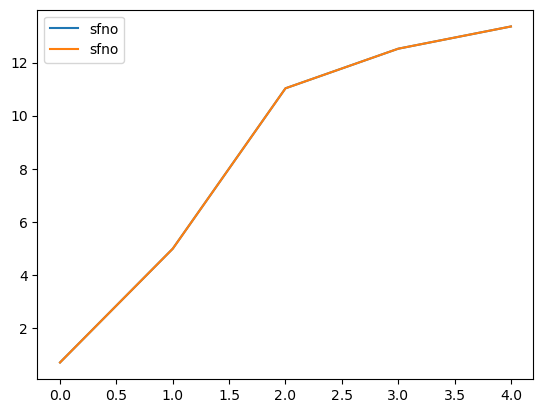

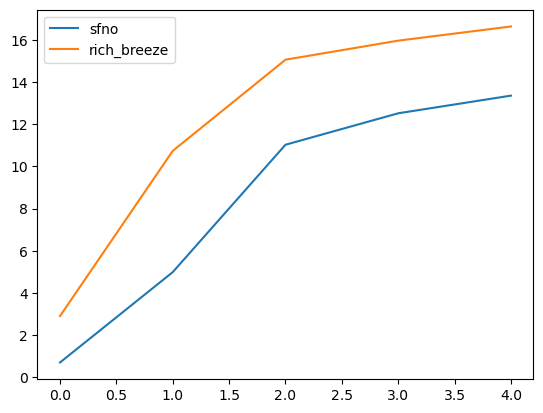

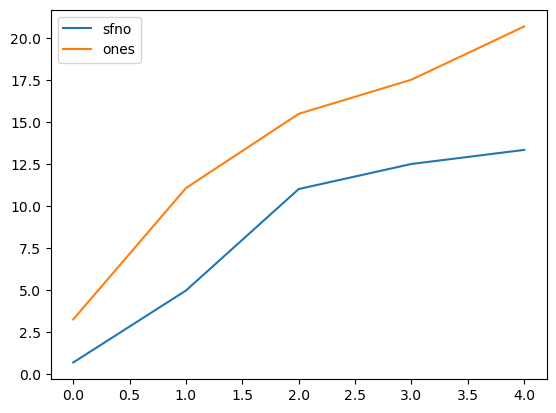

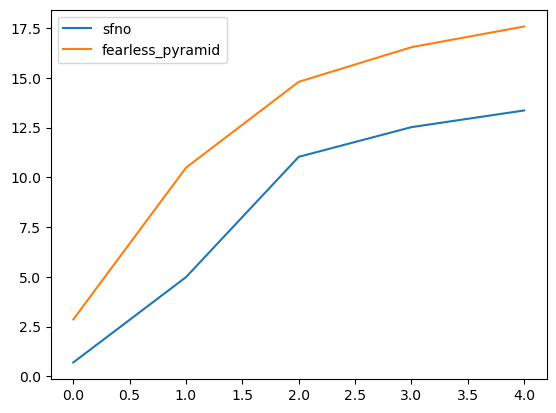

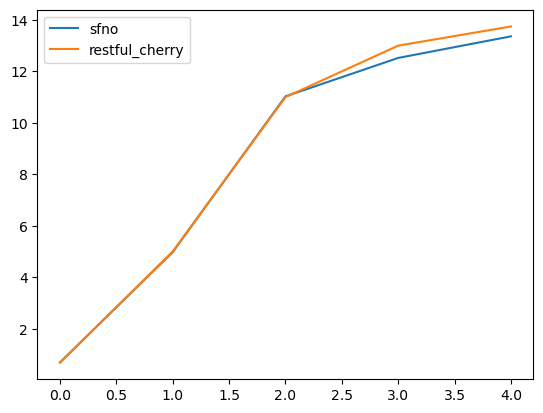

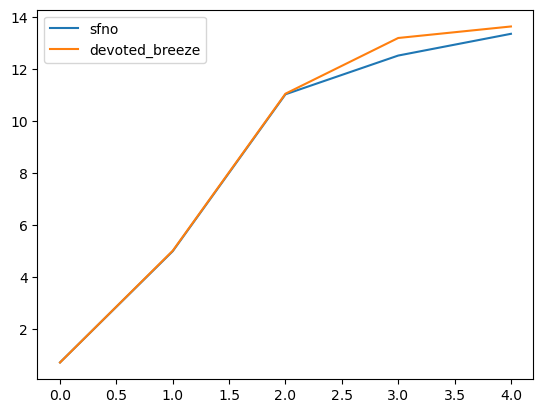

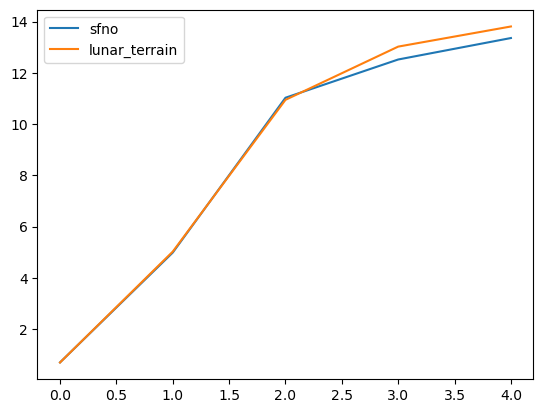

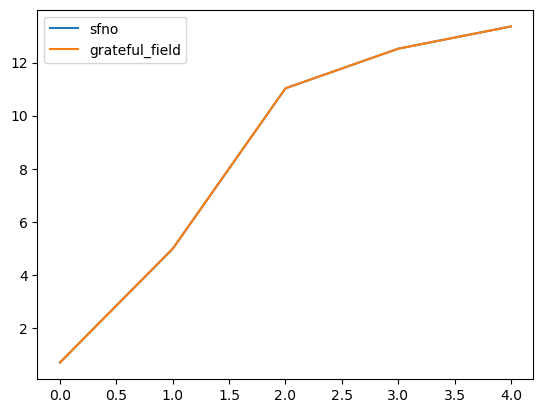

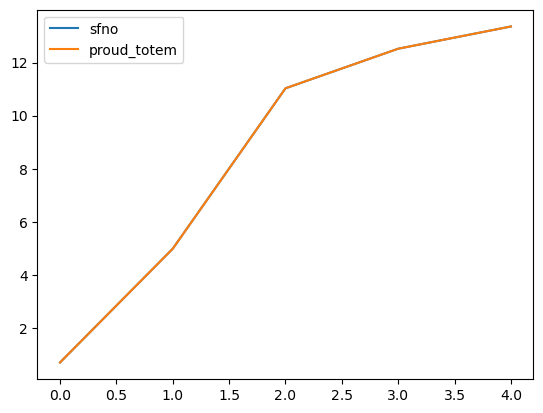

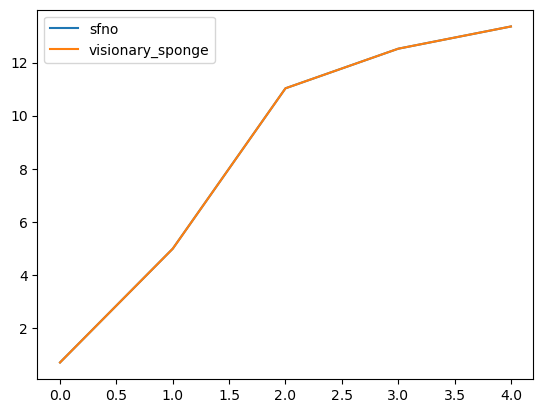

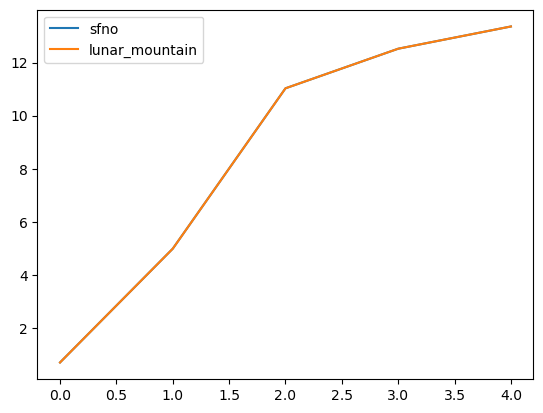

In [98]:
plt.figure()
for i,plot in enumerate(plots):
    plt.plot(plots[0],label=name_list[0])
    plt.plot(plot,label=name_list[i])
    plt.legend()
    plt.show()


In [92]:
t = xr.open_zarr("/mnt/qb/goswami/data/era5/era5_data_normalised_sfno_01.01.2016_31.12.2017.zarr")

In [94]:
for k in t.keys():print(k)

10m_u_component_of_wind
10m_v_component_of_wind
2m_temperature
geopotential
mean_sea_level_pressure
relative_humidity
surface_pressure
temperature
total_column_water_vapour
u_component_of_wind
v_component_of_wind


In [35]:
print(sfno)

<xarray.Dataset> Size: 53GB
Dimensions:                    (prediction_timedelta: 5, time: 36,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 288B 2018-01-04T12:00:00...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 748MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 748MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 748MB dask.a

In [22]:
rich_breeze_eval =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/eval_MSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")


In [30]:
rich_breeze_eval#['2m_temperature'].sel(lead_time='6hr',metric='mse')

<xarray.Dataset> Size: 4GB
Dimensions:                    (longitude: 1440, latitude: 721, level: 13,
                                lead_time: 5, metric: 3)
Coordinates:
  * longitude                  (longitude) float32 6kB 0.0 0.25 ... 359.5 359.8
  * latitude                   (latitude) float32 3kB -90.0 -89.75 ... 90.0
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 24B 'bias' 'mse' 'special_mse'
Data variables:
    10m_u_component_of_wind    (metric, lead_time, latitude, longitude) float32 62MB ...
    10m_v_component_of_wind    (metric, lead_time, latitude, longitude) float32 62MB ...
    surface_pressure           (metric, lead_time, latitude, longitude) float32 62MB ...
    2m_temperature             (metric, lead_time, latitude, longitude) float32 62MB ...
    total_column_water_vapour  (metric, lead_time, latitude, longitude) float32 62MB ...
    mean_sea_level_pressure    (metric, lead_time, latitude, longitude) float32 62MB ...
    geopotential               (metric, lead_time, level, latitude, longitude) float32 810MB ...
    relative_humidity          (metric, lead_time, level, latitude, longitude) float32 810MB ...
    temperature                (metric, lead_time, level, latitude, longitude) float32 810MB ...
    v_component_of_wind        (metric, lead_time, level, latitude, longitude) float32 810MB ...
    u_component_of_wind        (metric, lead_time, level, latitude, longitude) float32 810MB ...

In [32]:
rich_breeze_eval =  xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/eval_onlyMSE/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_denormalised_eval.nc")
rich_breeze_eval

<xarray.Dataset> Size: 3kB
Dimensions:                    (level: 13, lead_time: 5, metric: 2)
Coordinates:
  * level                      (level) int32 52B 1000 925 850 700 ... 150 100 50
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * metric                     (metric) object 16B 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 520B ...
    relative_humidity          (metric, lead_time, level) float32 520B ...
    temperature                (metric, lead_time, level) float32 520B ...
    v_component_of_wind        (metric, lead_time, level) float32 520B ...
    u_component_of_wind        (metric, lead_time, level) float32 520B ...
    10m_u_component_of_wind    (metric, lead_time) float32 40B ...
    10m_v_component_of_wind    (metric, lead_time) float32 40B ...
    surface_pressure           (metric, lead_time) float32 40B ...
    2m_temperature             (metric, lead_time) float32 40B ...
    total_column_water_vapour  (metric, lead_time) float32 40B ...
    mean_sea_level_pressure    (metric, lead_time) float32 40B ...

sfno


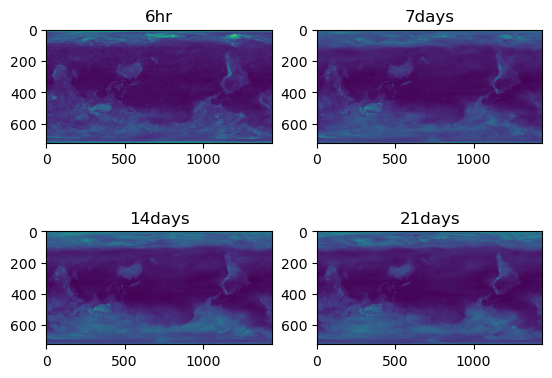

In [31]:
# rich_breeze_eval.sel(metric='mse')['2m_temperature'].
#test
var = "relative_humidity"
var = '2m_temperature'
s = ['sfno','ones','rich_breze','fearless_pyramid']
for idx,data in enumerate([rich_breeze_eval]):
    print(s[idx])
    hrs = ["6hr","7days","14days","21days","28days"]
    imgs = []
    for t in hrs:
        imgs.append( data[var].sel(lead_time=t).sel(metric='special_mse').to_numpy()) #.sel(level=300)
        # plt.imshow(img)
        # plt.show()
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(imgs[0])
    axs[0, 0].set_title(hrs[0])
    axs[0, 1].imshow(imgs[1])
    axs[0, 1].set_title(hrs[1])
    axs[1, 0].imshow(imgs[2])
    axs[1, 0].set_title(hrs[2])
    axs[1, 1].imshow(imgs[3])
    axs[1, 1].set_title(hrs[3])
    plt.show()

sfno


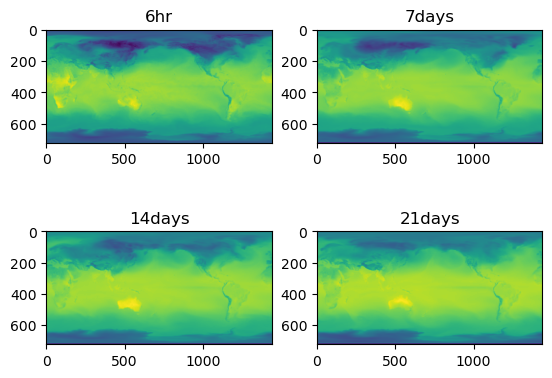

ones


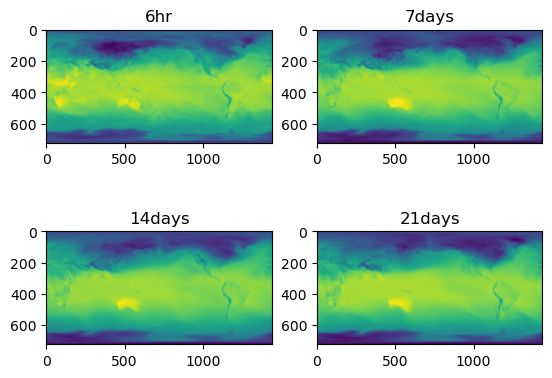

rich_breze


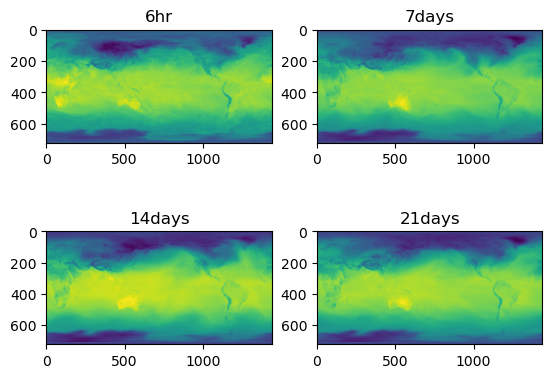

fearless_pyramid


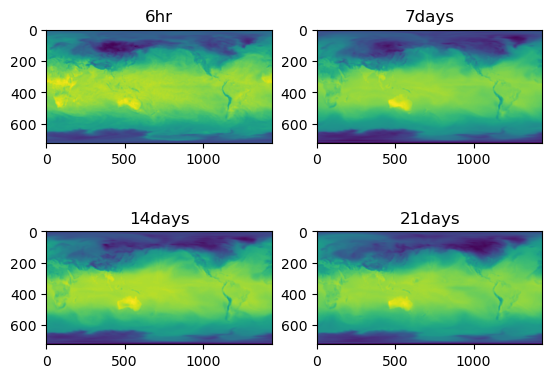

In [19]:
#test
var = "relative_humidity"
var = '2m_temperature'
s = ['sfno','ones','rich_breze','fearless_pyramid']
for idx,data in enumerate([sfno,ones,rich_breeze,fearless_pyramid]):
    print(s[idx])
    hrs = ["6hr","7days","14days","21days","28days"]
    imgs = []
    for t in hrs:
        imgs.append( data[var].sel(prediction_timedelta=t).isel(time=2).to_numpy()) #.sel(level=300)
        # plt.imshow(img)
        # plt.show()
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(imgs[0])
    axs[0, 0].set_title(hrs[0])
    axs[0, 1].imshow(imgs[1])
    axs[0, 1].set_title(hrs[1])
    axs[1, 0].imshow(imgs[2])
    axs[1, 0].set_title(hrs[2])
    axs[1, 1].imshow(imgs[3])
    axs[1, 1].set_title(hrs[3])
    plt.show()

sfno


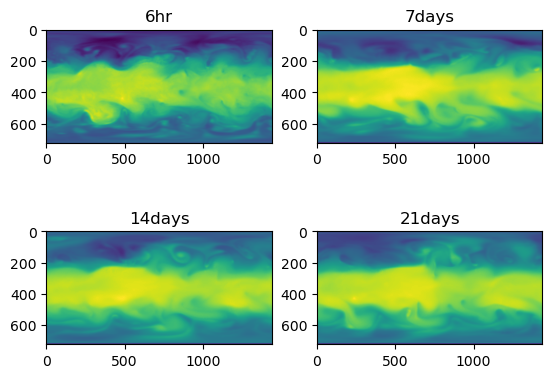

ones


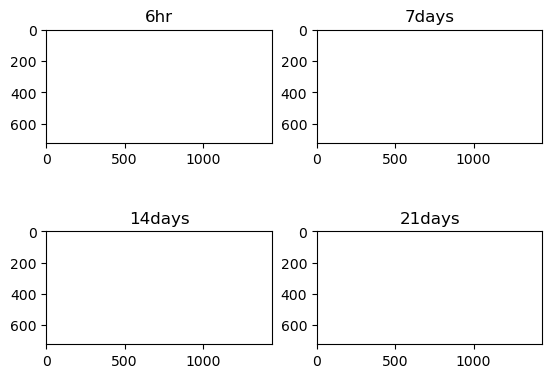

rich_breze


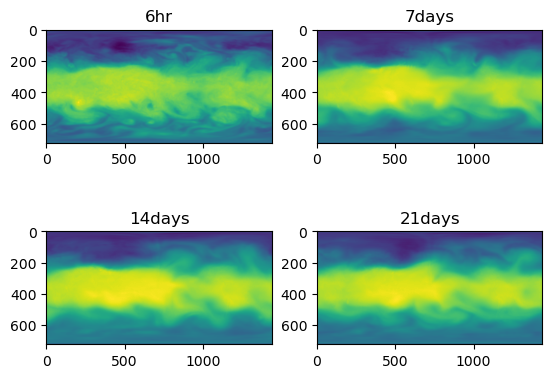

fearless_pyramid


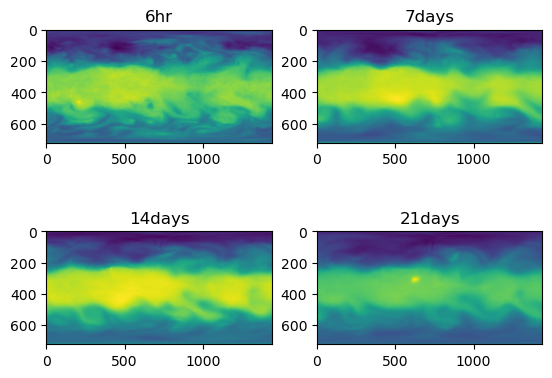

In [20]:
#test
var = "relative_humidity"
var = 'temperature'
s = ['sfno','ones','rich_breze','fearless_pyramid']
for idx,data in enumerate([sfno,ones,rich_breeze,fearless_pyramid]):
    print(s[idx])
    hrs = ["6hr","7days","14days","21days","28days"]
    imgs = []
    for t in hrs:
        imgs.append( data[var].sel(level=300).sel(prediction_timedelta=t).isel(time=2).to_numpy()) #
        # plt.imshow(img)
        # plt.show()
    fig, axs = plt.subplots(2, 2)
    axs[0, 0].imshow(imgs[0])
    axs[0, 0].set_title(hrs[0])
    axs[0, 1].imshow(imgs[1])
    axs[0, 1].set_title(hrs[1])
    axs[1, 0].imshow(imgs[2])
    axs[1, 0].set_title(hrs[2])
    axs[1, 1].imshow(imgs[3])
    axs[1, 1].set_title(hrs[3])
    plt.show()

In [17]:
# ones["relative_humidity"].sel(level=300,prediction_timedelta=t).isel(time=2).to_numpy()
ones["2m_temperature"].sel(prediction_timedelta=t).isel(time=2).to_numpy()

array([[251.12991, 251.12991, 251.12991, ..., 251.12991, 251.12991,
        251.12991],
       [250.71765, 250.7197 , 250.71965, ..., 250.71152, 250.71892,
        250.7222 ],
       [250.3798 , 250.37695, 250.38142, ..., 250.37782, 250.37344,
        250.37006],
       ...,
       [230.63077, 230.63603, 230.63266, ..., 230.62512, 230.62343,
        230.63875],
       [229.03575, 229.02829, 229.03287, ..., 229.04541, 229.04214,
        229.03867],
       [227.78944, 227.78944, 227.78944, ..., 227.78944, 227.78944,
        227.78944]], dtype=float32)

In [7]:
gcn = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/lunar-terrain-5-sID{21191}/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2018_shuffled_denormalised.zarr")
print(gcn)

<xarray.Dataset> Size: 44GB
Dimensions:                    (prediction_timedelta: 5, time: 30,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 240B 2018-01-02 ... 2018...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 623MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 623MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 623MB dask.a

In [8]:
rich_breeze = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/rich-breeze-23-sID{x01l12}/rich-breeze-23-sID{x01l13}/rich-breeze-23-sID{x01l14}/forecast_checkpoint_sfno_film_mae_iter=0_epoch=3_lead_time=112_time=2018-2019_shuffled_denormalised.zarr")
print(rich_breeze)

<xarray.Dataset> Size: 106GB
Dimensions:                    (prediction_timedelta: 5, time: 72,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 576B 2018-01-09 ... 2018...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 1GB dask.array<

In [14]:
print(sfno['relative_humidity'].isel(time=0).to_numpy().shape)
sfno["relative_humidity"].sel(level=300,prediction_timedelta="6hr").isel(time=2).to_numpy()

(5, 13, 721, 1440)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [22]:
jolly = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/forecast_lead_time=112_steps=300_time=2016-2018-shuffled_denormalised.zarr")
jolly

<xarray.Dataset> Size: 442GB
Dimensions:                    (prediction_timedelta: 5, time: 300,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 2kB 2016-01-17 ... 2017-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 6GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 81GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [27]:
microwave = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/whole-microwave-125-sID{32922}/forecastcheckpoint_sfno_film_mae_iter=0_epoch=1_lead_time=112_steps=200_time=2016-2018-shuffled_denormalised.zarr")

In [28]:
print(microwave)

<xarray.Dataset> Size: 295GB
Dimensions:                    (prediction_timedelta: 5, time: 200,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 2kB 2016-01-05 ... 2017-...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array

In [23]:
solar = xr.open_zarr("/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/forecast_lead_time=84_time=2016-2018_steps=6-shuffled.zarr")
solar

<xarray.Dataset> Size: 7GB
Dimensions:                    (prediction_timedelta: 4, time: 6,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 32B 0 d...
  * time                       (time) datetime64[ns] 48B 2016-04-29T06:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 100MB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 1GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [11]:
eval_test = xr.open_dataset("/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/eval/forecast_lead_time=84_time=2016-2018-shuffled_evaltest.nc")
eval_test

<xarray.Dataset> Size: 984B
Dimensions:                    (level: 4, lead_time: 4, metric: 3)
Coordinates:
  * level                      (level) int32 16B 300 850 925 1000
  * lead_time                  (lead_time) timedelta64[ns] 32B 0 days 06:00:0...
  * metric                     (metric) object 24B 'acc' 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 192B ...
    relative_humidity          (metric, lead_time, level) float32 192B ...
    temperature                (metric, lead_time, level) float32 192B ...
    v_component_of_wind        (metric, lead_time, level) float32 192B ...
    2m_temperature             (metric, lead_time) float32 48B ...
    total_column_water_vapour  (metric, lead_time) float32 48B ...
    mean_sea_level_pressure    (metric, lead_time) float32 48B ...

Text(0.5, 1.0, '21days')

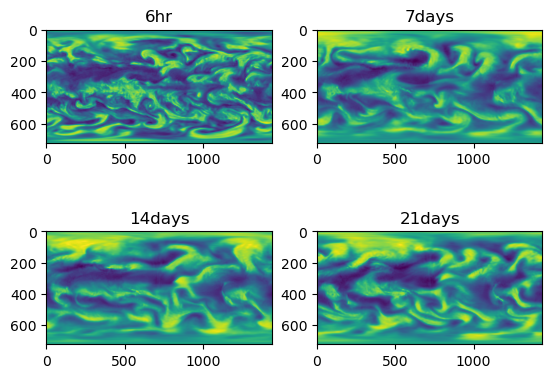

In [9]:
hrs = ["6hr","7days","14days","21days","28days"]
imgs = []
for t in hrs:
    imgs.append( rich_breeze["relative_humidity"].sel(level=300,prediction_timedelta=t).isel(time=2).to_numpy())
    # plt.imshow(img)
    # plt.show()
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(imgs[0])
axs[0, 0].set_title(hrs[0])
axs[0, 1].imshow(imgs[1])
axs[0, 1].set_title(hrs[1])
axs[1, 0].imshow(imgs[2])
axs[1, 0].set_title(hrs[2])
axs[1, 1].imshow(imgs[3])
axs[1, 1].set_title(hrs[3])
plt.show()
# img.time

<xarray.DataArray 'time' ()> Size: 8B
array('2016-01-17T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    level                 int64 8B 1000
    prediction_timedelta  timedelta64[ns] 8B 7 days
    time                  datetime64[ns] 8B 2016-01-17

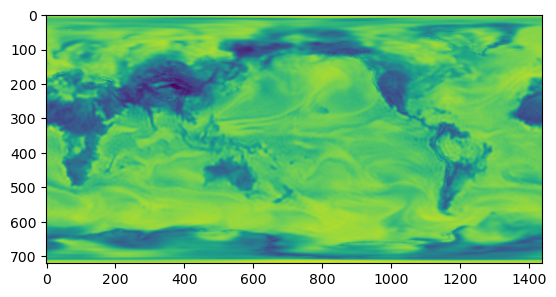

In [42]:
hrs = ["6hr","7days","14days","21days","28days"]
img = jolly["relative_humidity"].sel(level=1000,prediction_timedelta="7days").isel(time=0)
plt.imshow(img.to_numpy())
img.time

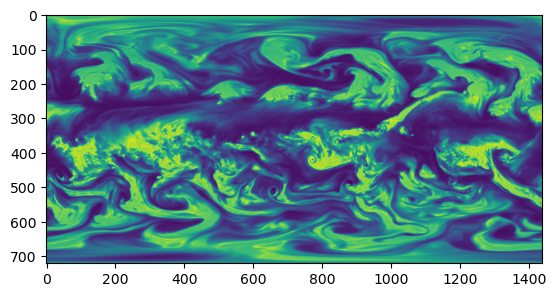

In [51]:
img_obs = obs["relative_humidity"].sel(level=300).sel(time='2016-01-17T00:00')
plt.imshow(img_obs.to_numpy())

In [29]:
def data(i):
    path = [
        [
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/forecast_lead_time=84_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/solar-spaceship-111-sID{0005}/eval/forecast_lead_time=84_time=2016-2018-shuffled_evaltest.nc'
        ],[
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/forecast_lead_time=112_time=2016-2018-shuffled.zarr',
            '/mnt/qb/work2/goswami0/gkd965/checkpoints/jolly-blaze-113-sID{13578}/eval/forecast_lead_time=112_time=2016-2018-shuffled_eval.nc'
        ]
    ]
    forecast_path, evals_path = path[i]
    forecast = xr.open_zarr(forecast_path)
    evals  = xr.open_dataset(evals_path)
    return forecast, evals
            

In [30]:
forecast, evals = data(1)

In [34]:
forecast

<xarray.Dataset> Size: 265GB
Dimensions:                    (prediction_timedelta: 5, time: 180,
                                latitude: 721, longitude: 1440, level: 13)
Coordinates:
  * latitude                   (latitude) float64 6kB 90.0 89.75 ... -90.0
  * level                      (level) int64 104B 50 100 150 ... 850 925 1000
  * longitude                  (longitude) float64 12kB 0.0 0.25 ... 359.5 359.8
  * prediction_timedelta       (prediction_timedelta) timedelta64[ns] 40B 0 d...
  * time                       (time) datetime64[ns] 1kB 2016-01-01T06:00:00 ...
Data variables:
    10m_u_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    2m_temperature             (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    geopotential               (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    mean_sea_level_pressure    (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    relative_humidity          (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    surface_pressure           (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    temperature                (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    total_column_water_vapour  (prediction_timedelta, time, latitude, longitude) float32 4GB dask.array<chunksize=(1, 1, 721, 1440), meta=np.ndarray>
    u_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>
    v_component_of_wind        (prediction_timedelta, time, level, latitude, longitude) float32 49GB dask.array<chunksize=(1, 1, 13, 721, 1440), meta=np.ndarray>

In [31]:
evals

<xarray.Dataset> Size: 1kB
Dimensions:                    (lead_time: 5, level: 4, metric: 3)
Coordinates:
  * lead_time                  (lead_time) timedelta64[ns] 40B 0 days 06:00:0...
  * level                      (level) int32 16B 300 850 925 1000
  * metric                     (metric) object 24B 'acc' 'bias' 'mse'
Data variables:
    geopotential               (metric, lead_time, level) float32 240B ...
    relative_humidity          (metric, lead_time, level) float32 240B ...
    temperature                (metric, lead_time, level) float32 240B ...
    v_component_of_wind        (metric, lead_time, level) float32 240B ...
    2m_temperature             (metric, lead_time) float32 60B ...
    total_column_water_vapour  (metric, lead_time) float32 60B ...
    mean_sea_level_pressure    (metric, lead_time) float32 60B ...

In [33]:
evals['2m_temperature'].sel(metric='mse').to_numpy()

array([82893.93 , 82852.   , 82857.125, 82862.79 , 82867.945],
      dtype=float32)

In [35]:
forecast['2m_temperature'].isel(prediction_timedelta=0,time=0).to_numpy()

array([[-0.81697243, -0.81697243, -0.81697243, ..., -0.81697243,
        -0.81697243, -0.81697243],
       [-0.79337794, -0.79294103, -0.7933525 , ..., -0.7942226 ,
        -0.79409003, -0.7935489 ],
       [-0.78844845, -0.7882945 , -0.7882586 , ..., -0.7898249 ,
        -0.78888774, -0.78906894],
       ...,
       [-1.2206126 , -1.2206371 , -1.2201658 , ..., -1.2203125 ,
        -1.2204665 , -1.2203162 ],
       [-1.2011966 , -1.2014477 , -1.2014947 , ..., -1.2015593 ,
        -1.2015358 , -1.2012155 ],
       [-1.2085196 , -1.2085196 , -1.2085196 , ..., -1.2085196 ,
        -1.2085196 , -1.2085196 ]], dtype=float32)

In [18]:
fn = f['2m_temperature'].isel(time=0,prediction_timedelta=0).to_numpy()

In [12]:
f.lead_time.to_numpy().astype('timedelta64[h]')

array([  6, 168, 336, 504], dtype='timedelta64[h]')

In [13]:
f['relative_humidity'].sel(metric='mse').to_numpy()

array([[ 2.0264692,  6.5869803, 13.890411 , 16.213217 ],
       [ 2.2185156,  6.9851036, 11.318614 , 10.151982 ],
       [ 2.260561 ,  7.6156135, 12.0974045, 10.889194 ],
       [ 2.3030612,  7.8895454, 12.572457 , 11.185738 ]], dtype=float32)

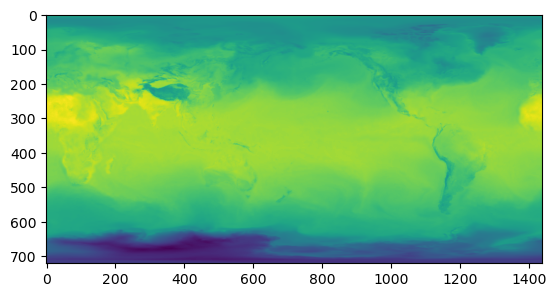

In [21]:
plt.imshow(fn)